In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the datasets
train_values = pd.read_csv("../data/raw/train_values.csv")
train_labels = pd.read_csv("../data/raw/train_labels.csv")
test_values = pd.read_csv("../data/raw/test_values.csv")


### Understanding the data

In [4]:
# shape of data 
print("Shape",train_values.shape)
print("Shape",train_labels.shape)
print("Shape",test_values.shape)


Shape (260601, 39)
Shape (260601, 2)
Shape (86868, 39)


In [5]:
# data sample
# chec notes/00_eda.txt for data column understanding 
train_values.sample(3)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
168882,8950,12,24,5791,2,15,5,4,t,r,...,0,0,0,0,0,0,0,0,0,0
50014,59514,0,536,869,2,25,10,5,o,w,...,0,0,0,0,0,0,0,0,0,0
167121,198147,6,845,6449,2,5,10,5,t,i,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# outputs or targets of the data 
train_labels.sample(3)

,building_id,damage_grade
186272,206519,3
39732,328774,2
145607,988666,2


In [7]:
test_values.sample(3)


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
70079,149931,10,825,9535,3,0,15,7,t,r,...,0,0,0,0,0,0,0,0,0,0
15384,607594,10,1248,2815,2,20,8,5,t,r,...,0,0,0,0,0,0,0,0,0,0
55725,717758,6,818,4304,2,10,6,4,n,r,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [9]:
train_labels.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [10]:
test_values.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             86868 non-null  int64 
 1   geo_level_1_id                          86868 non-null  int64 
 2   geo_level_2_id                          86868 non-null  int64 
 3   geo_level_3_id                          86868 non-null  int64 
 4   count_floors_pre_eq                     86868 non-null  int64 
 5   age                                     86868 non-null  int64 
 6   area_percentage                         86868 non-null  int64 
 7   height_percentage                       86868 non-null  int64 
 8   land_surface_condition                  86868 non-null  object
 9   foundation_type                         86868 non-null  object
 10  roof_type                               86868 non-null  object
 11  gr

In [11]:
# checking null values
train_values.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [12]:
train_labels.isnull().sum()


building_id     0
damage_grade    0
dtype: int64

In [13]:
test_values.isnull().sum()


building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [14]:
# basic statics 
train_values.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# merging data for easy handeling 
train = train_values.merge(train_labels, on='building_id')
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


### Understanding data with plots

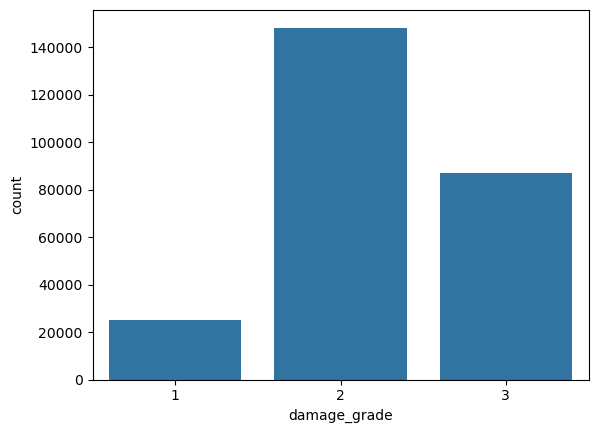

In [16]:
# here 1- low damage
# 2- medium damage
# 3- high damage/Destruction/demolisionn
# the data show that most of the buildings are 2(medium damaged), followed by 3(high damage) and 1(low damage)
sns.countplot(x='damage_grade',data=train)
plt.show()

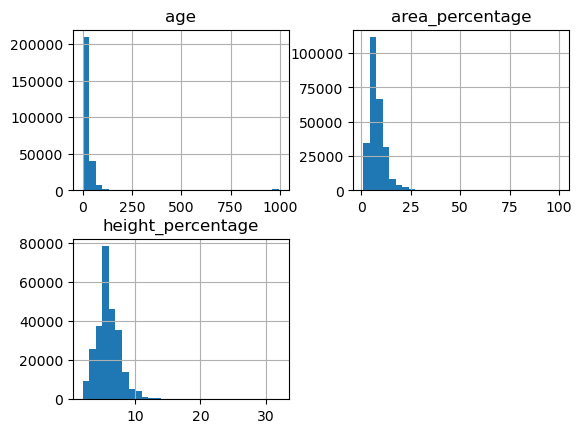

In [17]:
# numerical feature distribution 
train.hist(column=['age', 'area_percentage', 'height_percentage'], bins=30)
plt.show()

In [18]:
train.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

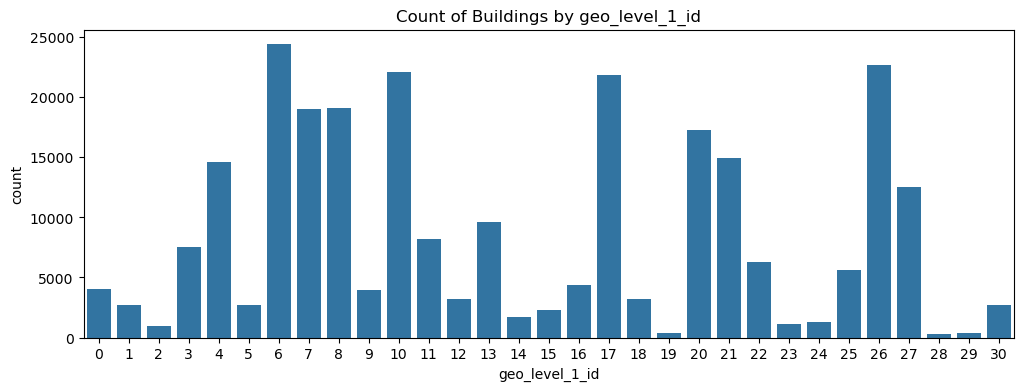

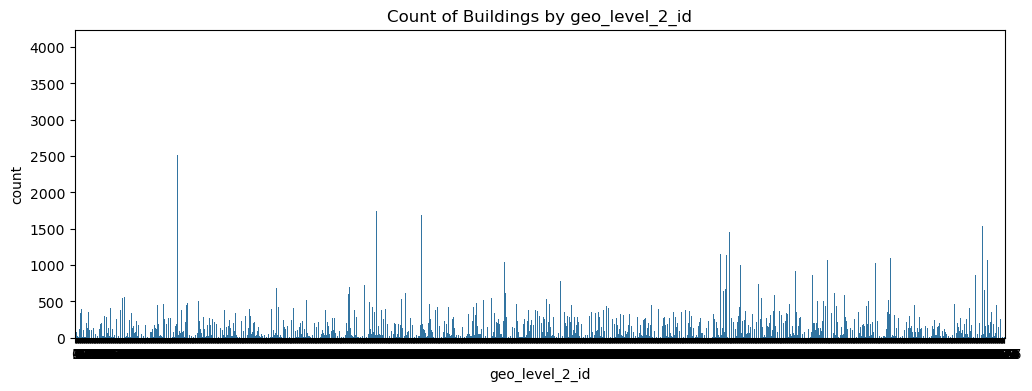

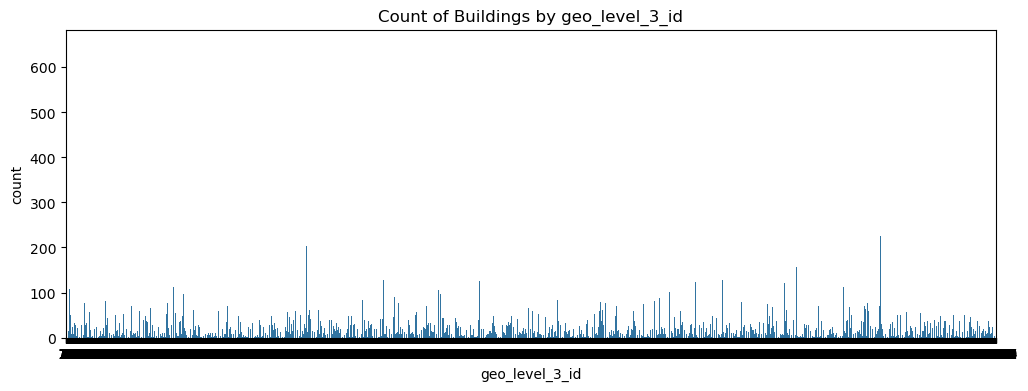

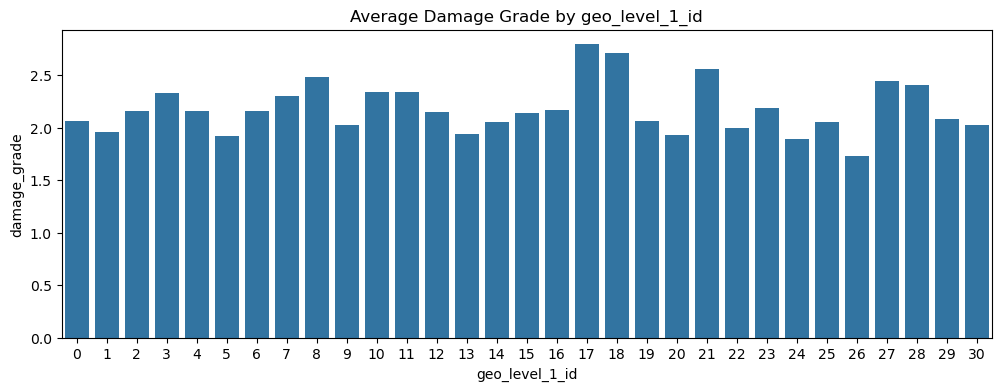

In [19]:

# 1. Count of buildings per geo_level_1_id
plt.figure(figsize=(12,4))
sns.countplot(x='geo_level_1_id', data=train)
plt.title('Count of Buildings by geo_level_1_id')
plt.show()

# 2. Count of buildings per geo_level_2_id
plt.figure(figsize=(12,4))
sns.countplot(x='geo_level_2_id', data=train)
plt.title('Count of Buildings by geo_level_2_id')
plt.show()

# 3. Count of buildings per geo_level_3_id
plt.figure(figsize=(12,4))
sns.countplot(x='geo_level_3_id', data=train)
plt.title('Count of Buildings by geo_level_3_id')
plt.show()

# 4. Average damage_grade by geo_level_1_id
avg_damage = train.groupby('geo_level_1_id')['damage_grade'].mean().reset_index()
plt.figure(figsize=(12,4))
sns.barplot(x='geo_level_1_id', y='damage_grade', data=avg_damage)
plt.title('Average Damage Grade by geo_level_1_id')
plt.show()


In [20]:
numeric_features = [
    'count_floors_pre_eq', 'age', 'area_percentage',
    'height_percentage', 'count_families'
]


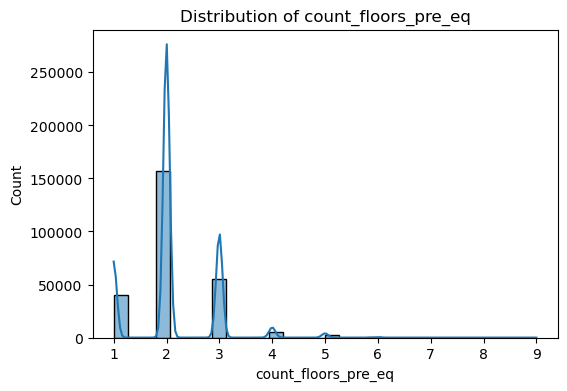

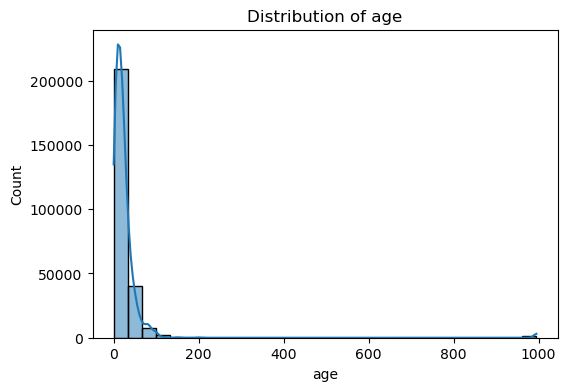

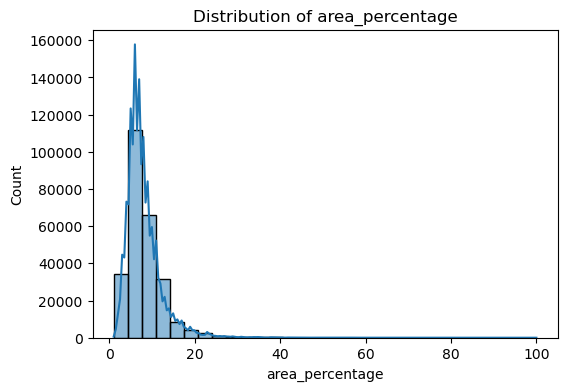

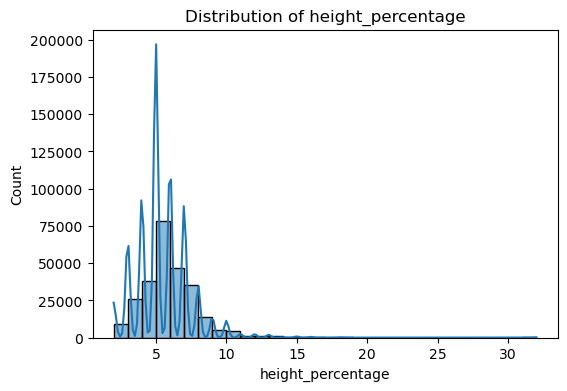

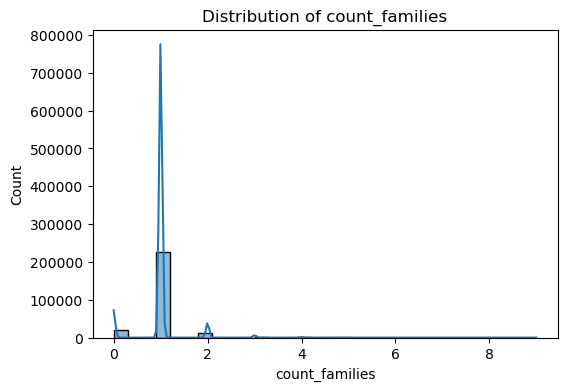

In [21]:
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

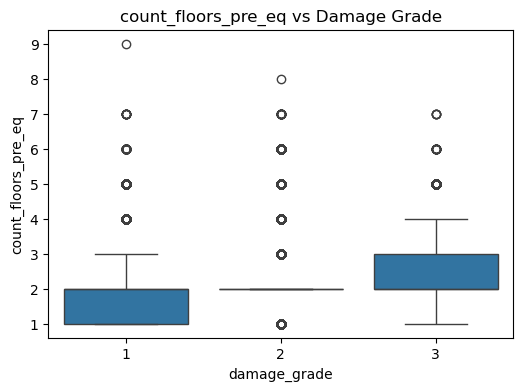

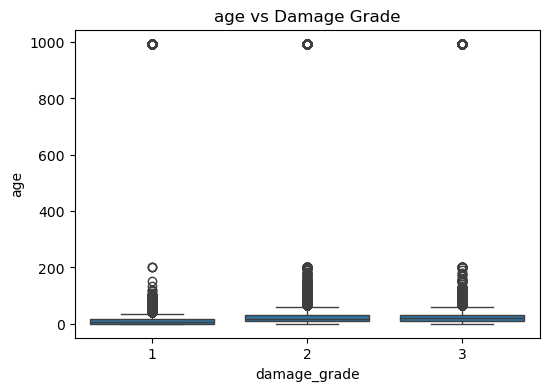

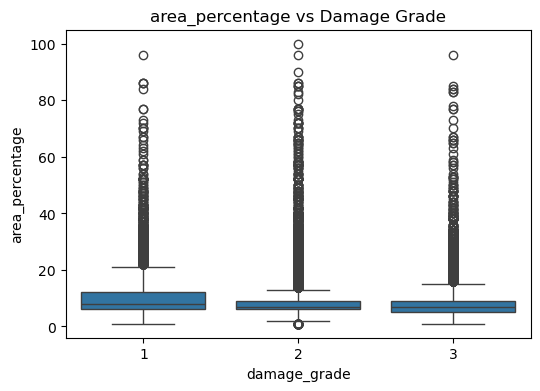

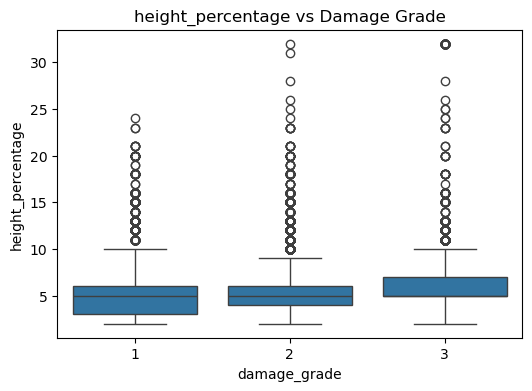

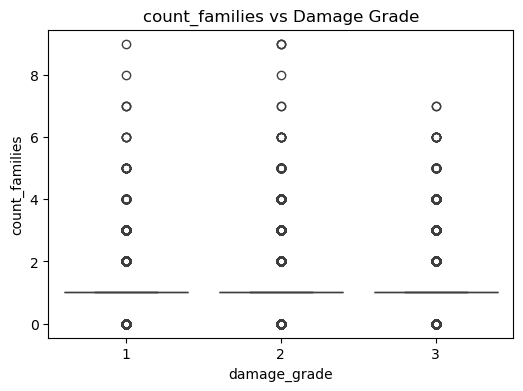

In [22]:
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='damage_grade', y=col, data=train)
    plt.title(f'{col} vs Damage Grade')
    plt.show()


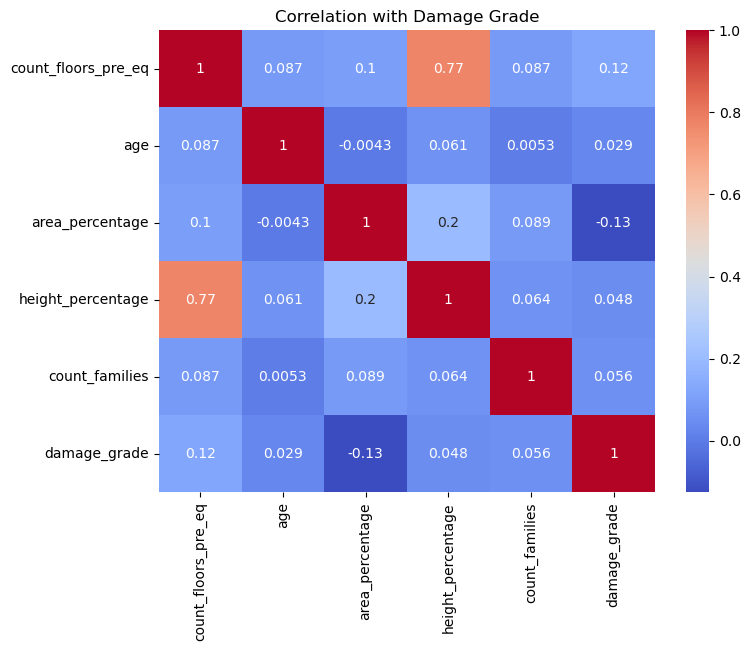

In [23]:
correlations = train[numeric_features + ['damage_grade']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation with Damage Grade')
plt.show()


In [24]:
summary = train.groupby('damage_grade')[numeric_features].describe().T
display(summary)


damage_grade                          1              2             3
count_floors_pre_eq count  25124.000000  148259.000000  87218.000000
                    mean       1.841307       2.131763      2.209338
                    std        0.825843       0.717466      0.693050
                    min        1.000000       1.000000      1.000000
                    25%        1.000000       2.000000      2.000000
                    50%        2.000000       2.000000      2.000000
                    75%        2.000000       2.000000      3.000000
                    max        9.000000       8.000000      7.000000
age                 count  25124.000000  148259.000000  87218.000000
                    mean      17.320490      27.342118     27.817423
                    std       83.684844      74.934312     67.683746
                    min        0.000000       0.000000      0.000000
                    25%        0.000000      10.000000     10.000000
                    50%        5.000000      15.000000     20.000000
                    75%       15.000000      30.000000     30.000000
                    max      995.000000     995.000000    995.000000
area_percentage     count  25124.000000  148259.000000  87218.000000
                    mean       9.716009       8.034049      7.501743
                    std        6.289094       4.257419      3.786896
                    min        1.000000       1.000000      1.000000
                    25%        6.000000       6.000000      5.000000
                    50%        8.000000       7.000000      7.000000
                    75%       12.000000       9.000000      9.000000
                    max       96.000000     100.000000     96.000000
height_percentage   count  25124.000000  148259.000000  87218.000000
                    mean       5.147349       5.432345      5.520477
                    std        2.511039       1.826253      1.865423
                    min        2.000000       2.000000      2.000000
                    25%        3.000000       4.000000      5.000000
                    50%        5.000000       5.000000      5.000000
                    75%        6.000000       6.000000      7.000000
                    max       24.000000      32.000000     32.000000
count_families      count  25124.000000  148259.000000  87218.000000
                    mean       0.915101       0.982018      1.007063
                    std        0.496852       0.402779      0.417434
                    min        0.000000       0.000000      0.000000
                    25%        1.000000       1.000000      1.000000
                    50%        1.000000       1.000000      1.000000
                    75%        1.000000       1.000000      1.000000
                    max        9.000000       9.000000      7.000000

In [25]:
categorical_variables = ['land_surface_condition', 'foundation_type', 'roof_type',
'ground_floor_type', 'other_floor_type', 'position',
'plan_configuration', 'legal_ownership_status']

In [ ]:
for i in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train,x=train[i],hue='damage_grade')


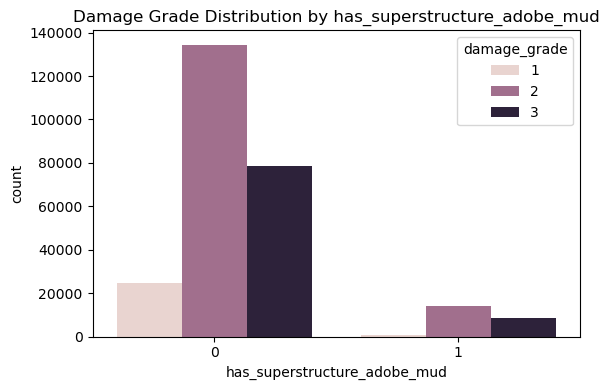

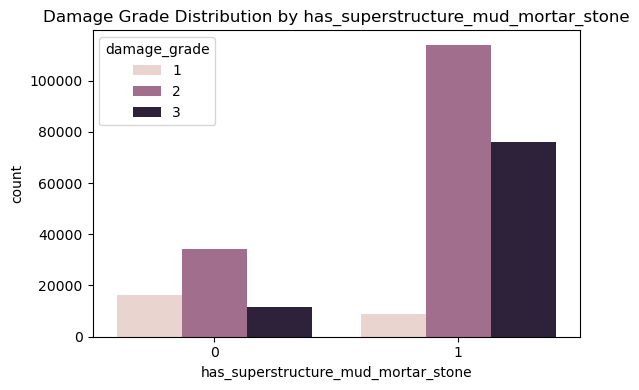

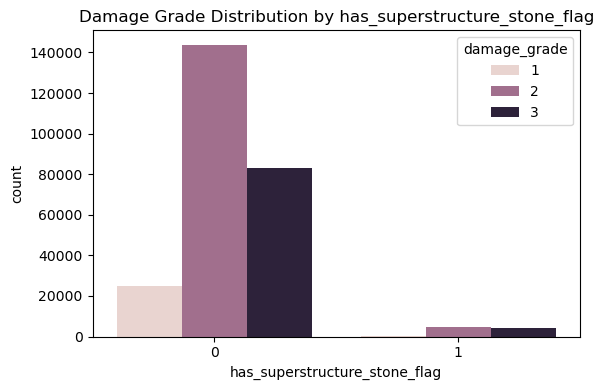

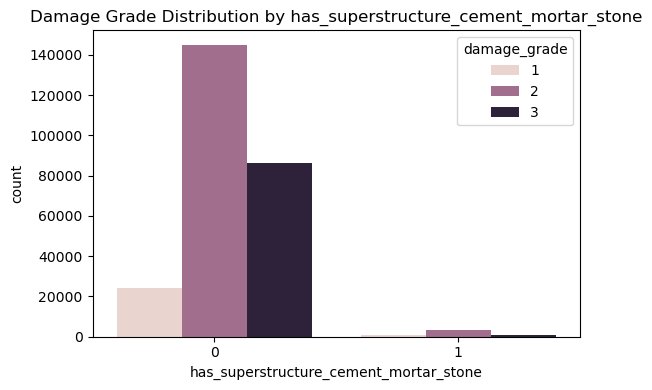

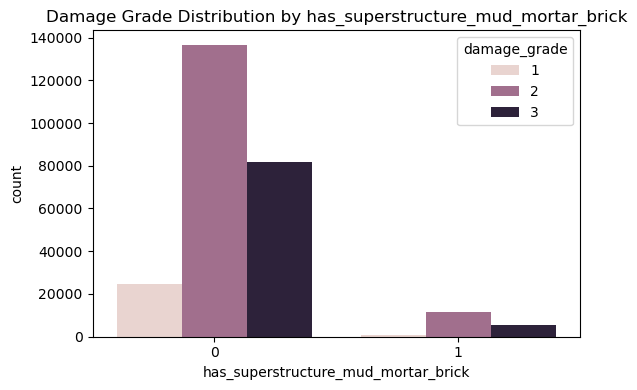

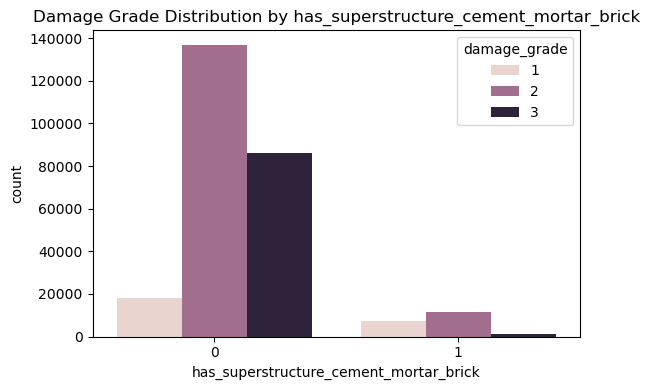

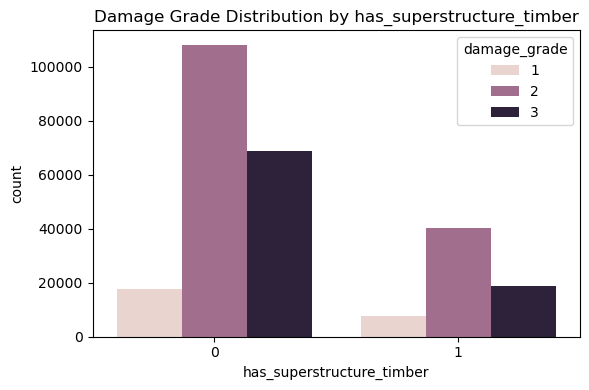

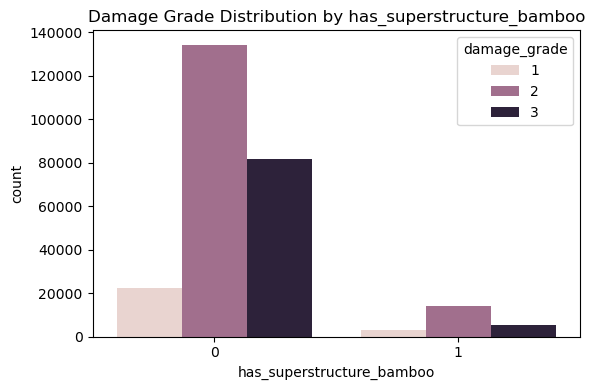

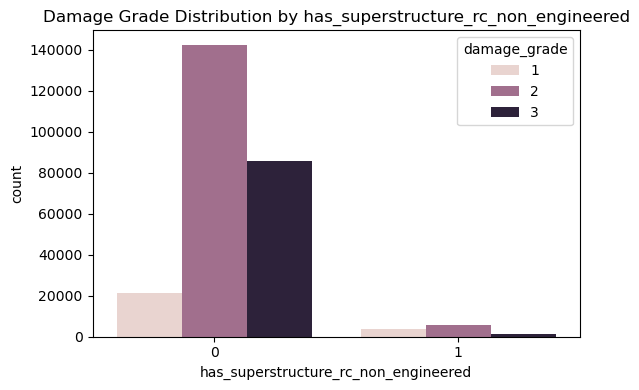

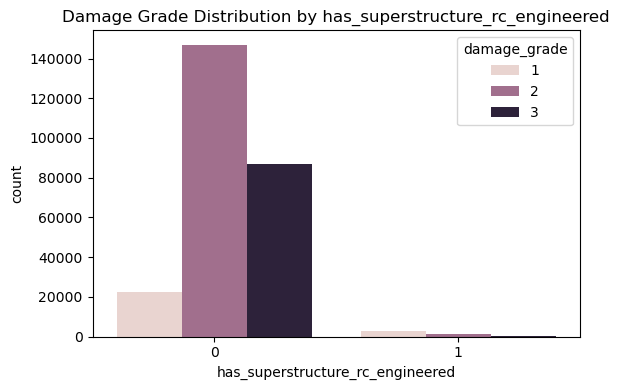

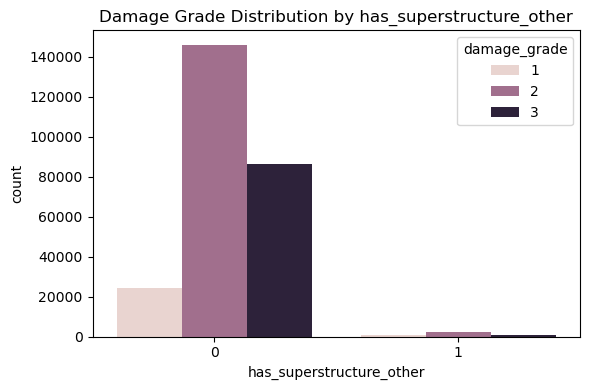

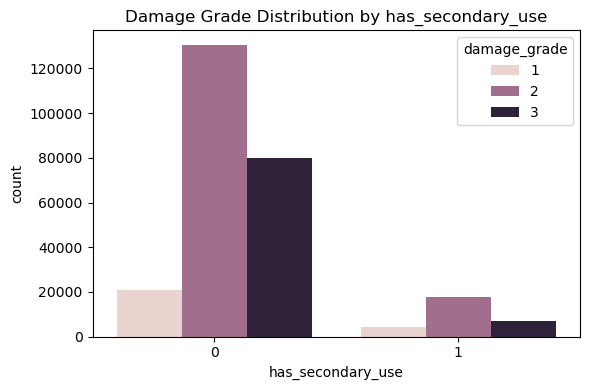

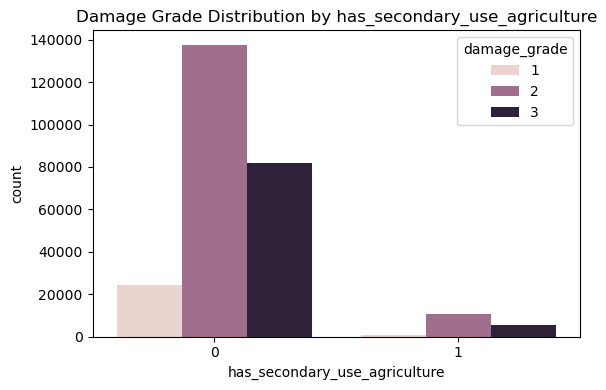

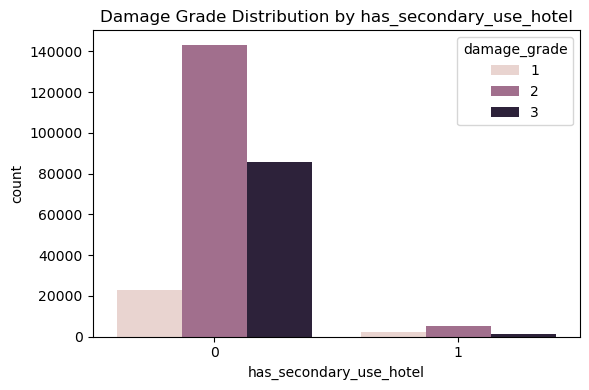

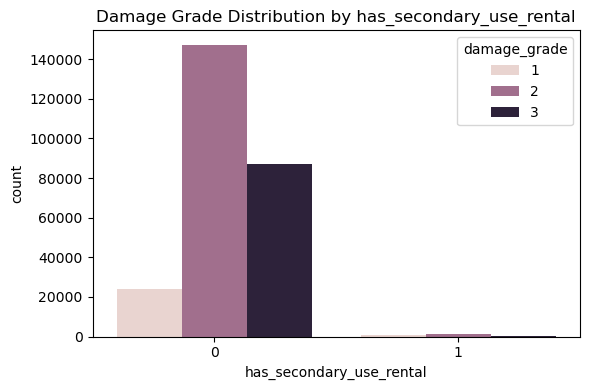

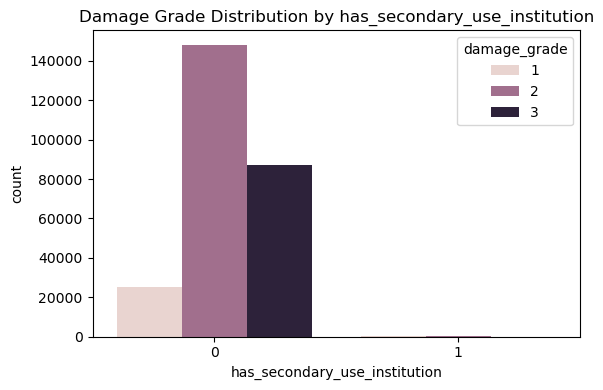

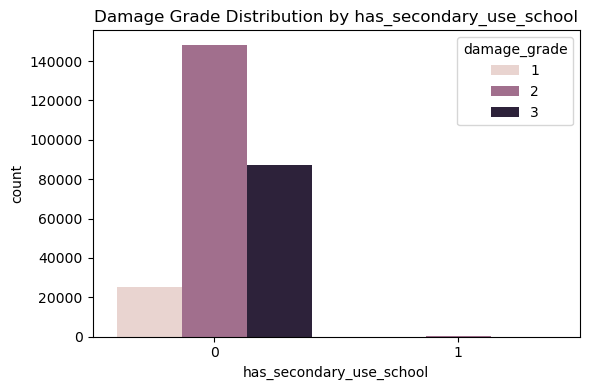

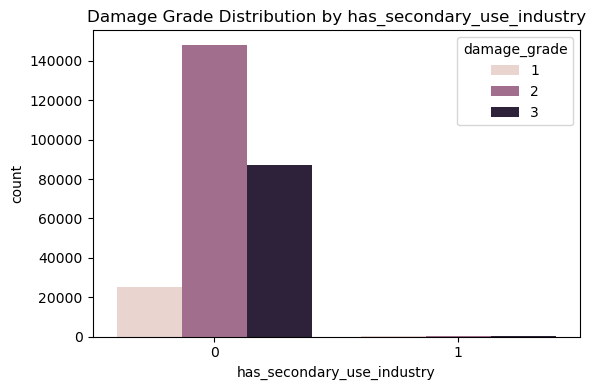

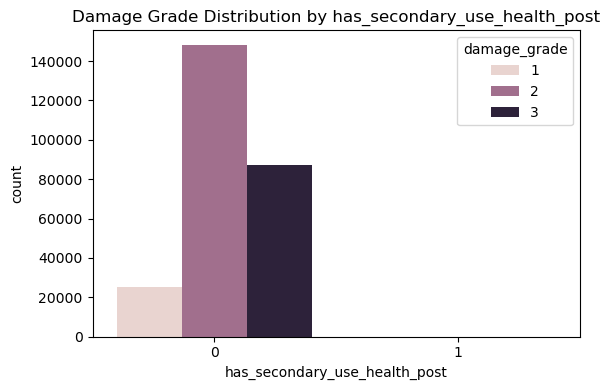

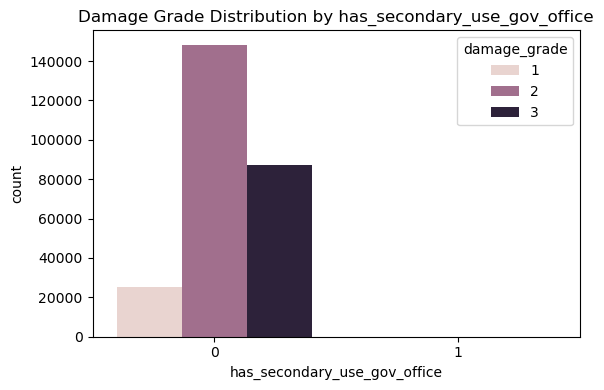

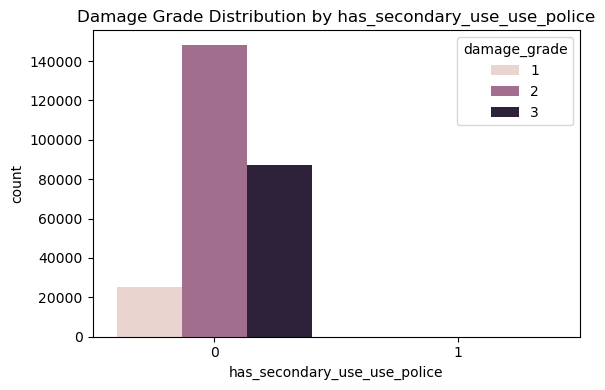

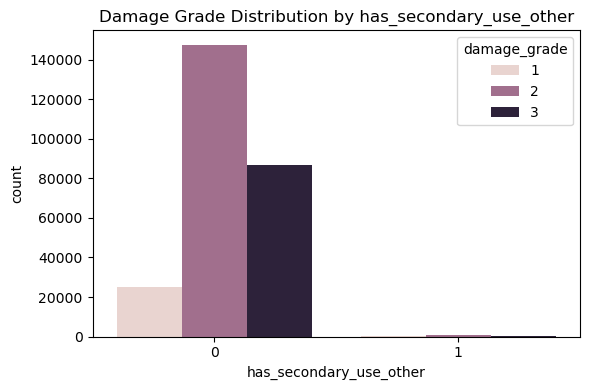

In [ ]:

# Get all binary columns (start with 'has_')
binary_cols = [col for col in train.columns if col.startswith('has_')]

# Plot count and relation with damage_grade
for col in binary_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='damage_grade', data=train)
    plt.title(f'Damage Grade Distribution by {col}')
    plt.tight_layout()
    plt.show()


In [ ]:
train.sample(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
137631,639507,3,720,6531,3,40,8,8,t,r,...,0,0,0,0,0,0,0,0,0,3
83400,871149,8,1373,11685,2,30,5,6,n,r,...,0,0,0,0,0,0,0,0,0,3
61651,971261,6,453,3656,2,20,7,5,t,r,...,0,0,0,0,0,0,0,0,0,2
166120,463220,4,447,522,3,25,6,9,t,r,...,0,0,0,0,0,0,0,0,0,3
244498,675247,13,1035,4207,2,25,6,4,t,r,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

numerical_columns = [
    'count_floors_pre_eq', 'age', 'area_percentage',
    'height_percentage', 'count_families'
]

for col in numerical_columns:
    outliers = detect_outliers_iqr(train, col)
    print(f"\nOutliers in {col}: {len(outliers)}")
    print(outliers[[col]])



Outliers in count_floors_pre_eq: 103978
        count_floors_pre_eq
4                         3
9                         1
11                        1
13                        3
17                        3
...                     ...
260591                    1
260594                    6
260596                    1
260598                    3
260600                    3

[103978 rows x 1 columns]

Outliers in age: 12499
        age
24       80
42       70
90       70
124      65
216     100
...     ...
260480   80
260541  100
260542  995
260551   70
260579  995

[12499 rows x 1 columns]

Outliers in area_percentage: 13557
        area_percentage
19                   16
29                   27
42                   16
63                   16
71                   17
...                 ...
260520               17
260564               16
260582               27
260585               17
260588               17

[13557 rows x 1 columns]

Outliers in height_percentage: 7843
        height_

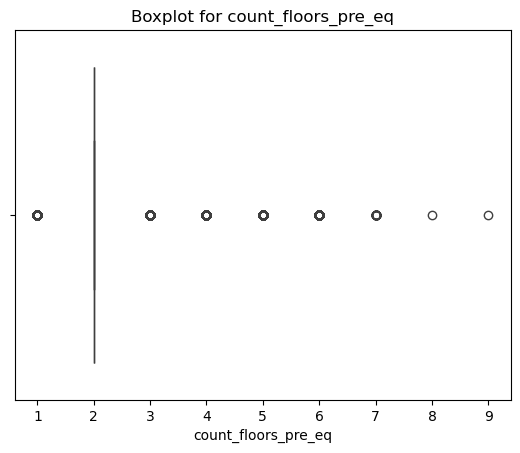

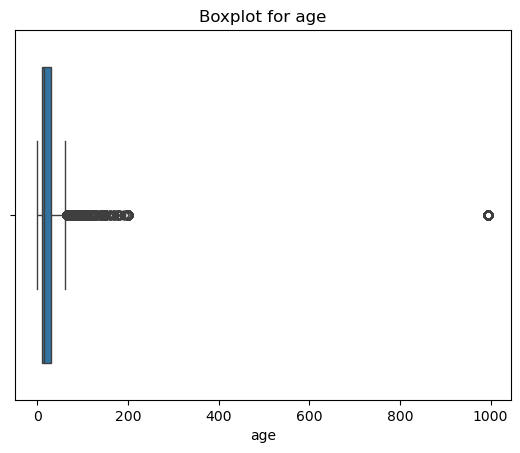

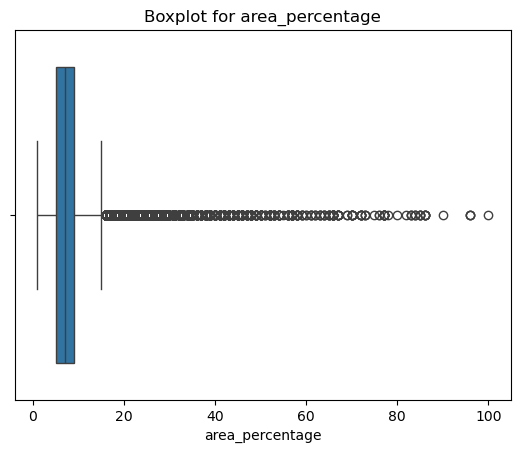

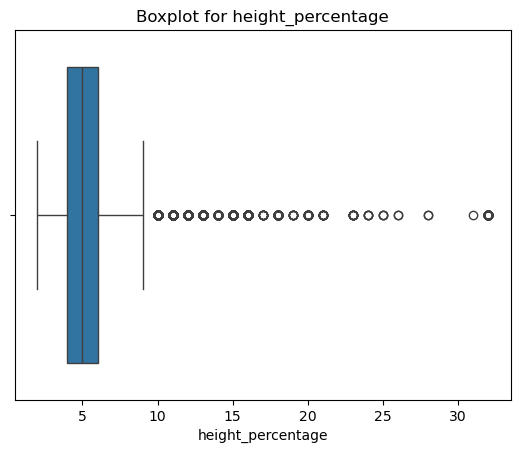

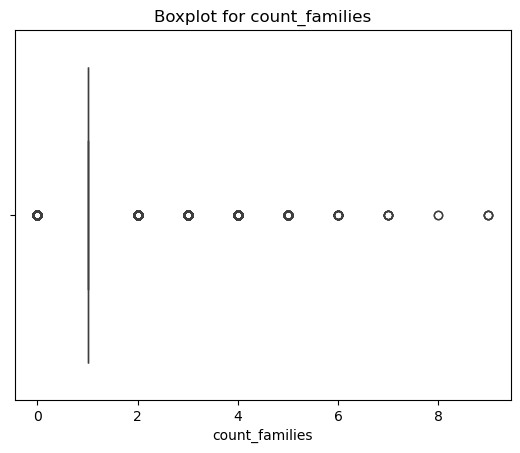

In [ ]:
for col in numerical_columns:
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [ ]:
categorical_columns = [
    'land_surface_condition', 'foundation_type', 'roof_type',
    'ground_floor_type', 'other_floor_type', 'position',
    'plan_configuration', 'legal_ownership_status'
]

for col in categorical_columns:
    print(f"\nValue counts for {col}:\n{train[col].value_counts(normalize=True).round(3)}")



Value counts for land_surface_condition:
land_surface_condition
t    0.832
n    0.136
o    0.032
Name: proportion, dtype: float64

Value counts for foundation_type:
foundation_type
r    0.841
w    0.058
u    0.055
i    0.041
h    0.006
Name: proportion, dtype: float64

Value counts for roof_type:
roof_type
n    0.702
q    0.236
x    0.062
Name: proportion, dtype: float64

Value counts for ground_floor_type:
ground_floor_type
f    0.804
x    0.095
v    0.094
z    0.004
m    0.002
Name: proportion, dtype: float64

Value counts for other_floor_type:
other_floor_type
q    0.634
x    0.167
j    0.153
s    0.046
Name: proportion, dtype: float64

Value counts for position:
position
s    0.775
t    0.165
j    0.051
o    0.009
Name: proportion, dtype: float64

Value counts for plan_configuration:
plan_configuration
d    0.960
q    0.022
u    0.014
s    0.001
c    0.001
a    0.001
o    0.001
m    0.000
n    0.000
f    0.000
Name: proportion, dtype: float64

Value counts for legal_ownership_stat

In [ ]:
superstructure_cols = [
    'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
    'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick',
    'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
    'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered', 'has_superstructure_other'
]

train['superstructure_sum'] = train[superstructure_cols].sum(axis=1)

multi_structure_outliers = train[train['superstructure_sum'] > 3]

conflicting_rc = train[
    (train['has_superstructure_rc_engineered'] == 1) &
    (train['has_superstructure_rc_non_engineered'] == 1)
]

no_structure_flagged = train[train[superstructure_cols].sum(axis=1) == 0]


In [ ]:
superstructure_cols = [
    'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
    'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick',
    'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
    'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered', 'has_superstructure_other'
]

train['superstructure_sum'] = train[superstructure_cols].sum(axis=1)

multi_structure_outliers = train[train['superstructure_sum'] > 3]

conflicting_rc = train[
    (train['has_superstructure_rc_engineered'] == 1) &
    (train['has_superstructure_rc_non_engineered'] == 1)
]

no_structure_flagged = train[train[superstructure_cols].sum(axis=1) == 0]


In [ ]:
secondary_use_cols = [
    'has_secondary_use_agriculture', 'has_secondary_use_hotel',
    'has_secondary_use_rental', 'has_secondary_use_institution',
    'has_secondary_use_school', 'has_secondary_use_industry',
    'has_secondary_use_health_post', 'has_secondary_use_gov_office',
    'has_secondary_use_use_police', 'has_secondary_use_other'
]

train['secondary_use_sum'] = train[secondary_use_cols].sum(axis=1)
secondary_outliers = train[train['secondary_use_sum'] > 2]


In [ ]:
train['is_outlier'] = False

for col in numerical_columns:
    outliers = detect_outliers_iqr(train, col)
    train.loc[outliers.index, 'is_outlier'] = True

train.loc[train['superstructure_sum'] > 3, 'is_outlier'] = True
train.loc[conflicting_rc.index, 'is_outlier'] = True
train.loc[no_structure_flagged.index, 'is_outlier'] = True
train.loc[secondary_outliers.index, 'is_outlier'] = True

print(f"\nTotal flagged outliers: {train['is_outlier'].sum()}")



Total flagged outliers: 135486


In [ ]:
outlier_indices = set()

for col in numerical_columns:
    outliers = detect_outliers_iqr(train, col)
    outlier_indices.update(outliers.index)

outlier_indices.update(multi_structure_outliers.index)
outlier_indices.update(conflicting_rc.index)
outlier_indices.update(no_structure_flagged.index)
outlier_indices.update(secondary_outliers.index)

train_cleaned = train.drop(index=outlier_indices).reset_index(drop=True)

print(f"Removed {len(outlier_indices)} outlier rows.")
print(f"Cleaned dataset shape: {train_cleaned.shape}")


Removed 135486 outlier rows.
Cleaned dataset shape: (125115, 43)


In [ ]:
train = train_cleaned.copy()

In [ ]:
train.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [ ]:
train_values.shape

(260601, 39)

In [ ]:
train.shape

(125115, 43)

In [ ]:
train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,superstructure_sum,secondary_use_sum,is_outlier
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,3,2,0,False
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,2,1,0,False
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,3,1,0,False
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,2,3,0,False
4,333020,8,558,6089,2,10,9,5,t,r,...,0,0,0,0,0,0,2,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125110,207683,10,1382,1903,2,25,5,5,t,r,...,0,0,0,0,0,0,2,2,0,False
125111,226421,8,767,8613,2,5,13,5,t,r,...,0,0,0,0,0,0,2,1,1,False
125112,827012,8,268,4718,2,20,8,5,t,r,...,0,0,0,0,0,0,3,1,0,False
125113,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,3,1,0,False


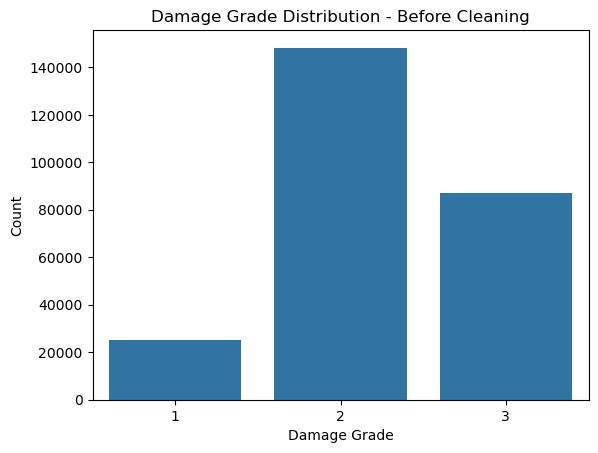

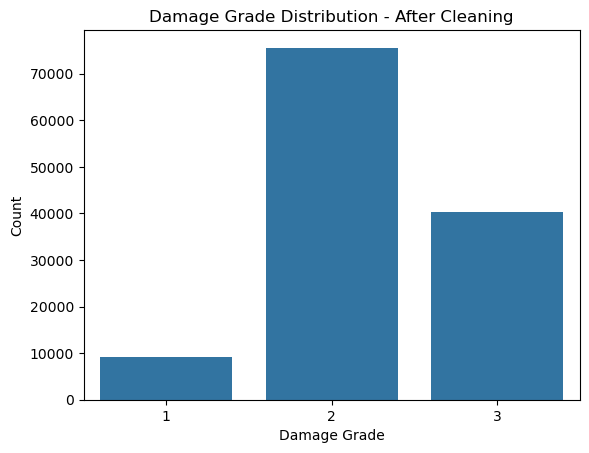

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Merge on building_id
train_pd = pd.merge(train_values, train_labels, on='building_id', how='inner')

# BEFORE cleaning (raw data)
sns.countplot(x='damage_grade', data=train_pd)
plt.title("Damage Grade Distribution - Before Cleaning")
plt.xlabel("Damage Grade")
plt.ylabel("Count")
plt.show()

# AFTER cleaning
sns.countplot(x='damage_grade', data=train)
plt.title("Damage Grade Distribution - After Cleaning")
plt.xlabel("Damage Grade")
plt.ylabel("Count")
plt.show()


In [ ]:
train.to_csv('../data/processed/processed_train_values.csv',index=False)

In [ ]:
train

NameError: name 'train' is not defined